## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]

## loading dataset

In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.shape

(5000, 7)

## Missing values heatmap

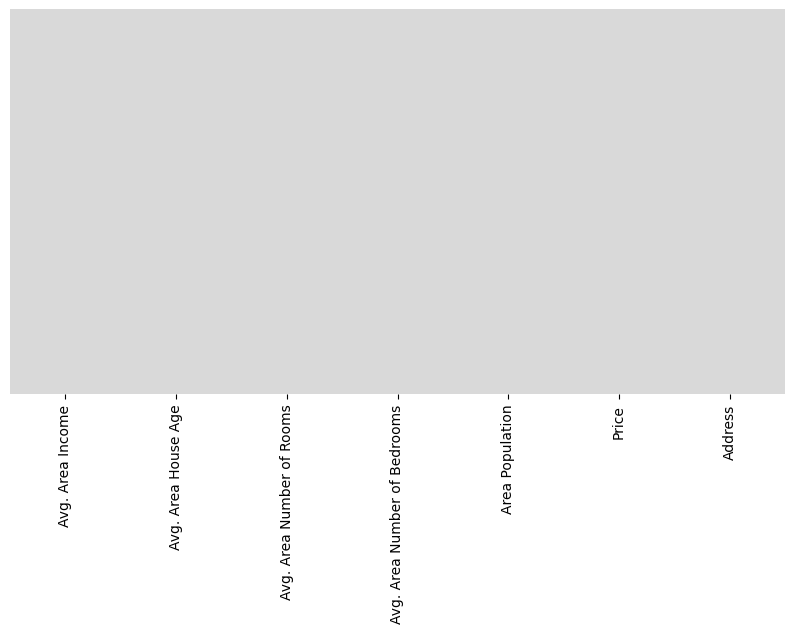

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='tab20c_r')
plt.show()

## Remove address feature

In [ ]:
df.drop('Address', axis=1, inplace=True)

In [ ]:
# remove missing values
df.dropna(inplace=True)

In [ ]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


## Statistical summary

In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.shape

(5000, 6)

## Target variable splitting

In [ ]:
x = df.drop('Price', axis=1)
y = df['Price']

## shape of target and input variables

In [ ]:
x.shape

(5000, 5)

In [ ]:
y.shape

(5000,)

## Preprocessing or standardization

In [ ]:
from sklearn import preprocessing
pre_pro= preprocessing.StandardScaler().fit(x)
x_transform = pre_pro.fit_transform(x)

In [ ]:
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [ ]:
pre_pro_y= preprocessing.StandardScaler().fit(y)
y_transform = pre_pro_y.fit_transform(y)
y_transform

array([[-0.49008146],
       [ 0.77550829],
       [-0.49021053],
       ...,
       [-0.570244  ],
       [-0.0946402 ],
       [ 0.18941143]])

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform,y_transform, test_size=.10, random_state=101)

In [ ]:
print(x_train.shape)
x_train

(4500, 5)


array([[-0.11408928,  0.80444154, -0.29520465, -1.20851967, -0.3643696 ],
       [ 0.02890281, -1.76734641, -0.70556898,  0.37168951,  0.53116273],
       [-0.6693936 , -1.08664827,  0.03752352,  1.03618773,  0.63038443],
       ...,
       [-1.21622414, -2.26082045, -0.11881994, -1.36248876,  2.72262263],
       [-0.51972297, -0.04232647, -1.06821454,  0.09616586, -0.34643377],
       [ 0.60952689,  1.68209486,  1.44465262,  0.2825495 ,  2.01366478]])

In [ ]:
y_train

array([[-0.19918861],
       [-1.10849519],
       [-0.47833027],
       ...,
       [-0.36657611],
       [-1.03934158],
       [ 2.48186748]])

In [ ]:
print(x_test.shape)
x_test

(500, 5)


array([[-0.16966556, -0.26234629,  0.80282069,  0.27444587,  0.06302125],
       [-0.60041423, -1.0606313 ,  0.43738986,  1.81413686, -1.02322996],
       [ 0.47480377,  0.79651541,  1.34160257, -0.51971054,  0.70416773],
       ...,
       [ 1.65778435,  0.17973419,  0.97380976,  0.33117132,  0.70443968],
       [-0.55632833, -0.30507086, -0.1366228 ,  0.20961677,  0.05592095],
       [-1.16873341, -0.30689361, -0.18941613, -0.48729599, -0.33814832]])

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()
li_reg.fit(x_train,y_train)

LinearRegression()

## Model testing - Class prediction

In [ ]:
y_pred = li_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(500, 1)
[[ 7.08770782e-02]
 [-1.16116236e+00]
 [ 1.43709251e+00]
 [-7.33380624e-01]
 [-6.74500500e-01]
 [-1.66062709e+00]
 [-4.46524314e-01]
 [-1.06379917e+00]
 [ 6.03190733e-01]
 [-8.56030840e-02]
 [ 6.29889563e-01]
 [ 1.82706221e-01]
 [ 1.42965357e+00]
 [ 2.96310328e-01]
 [ 4.36746182e-01]
 [-2.53490585e-02]
 [-1.74529237e+00]
 [-7.57775229e-01]
 [-2.84693278e-02]
 [-9.78251659e-02]
 [-2.05423965e+00]
 [ 1.51755468e+00]
 [ 1.76377221e+00]
 [-9.50239580e-02]
 [-4.72094032e-01]
 [ 1.63737167e+00]
 [ 1.51737311e+00]
 [ 5.89353567e-01]
 [ 4.36300139e-01]
 [ 8.72035453e-01]
 [-1.42321126e+00]
 [ 1.47943417e+00]
 [ 6.60470410e-01]
 [-5.83577393e-01]
 [ 1.45693861e-01]
 [-8.90399530e-01]
 [-1.31390376e-01]
 [-6.56885801e-01]
 [ 2.75494242e-01]
 [-1.26828883e+00]
 [ 4.54443104e-01]
 [-1.85651710e+00]
 [-1.15725850e+00]
 [ 1.87441444e+00]
 [ 1.24473266e+00]
 [-7.57196219e-01]
 [-2.91126861e-01]
 [-1.24474568e+00]
 [-2.05876114e-01]
 [ 6.82947244e-01]
 [ 6.44197274e-01]
 [-1.91399546e-01]
 [-

## Scatter plot of linear regression

In [ ]:
y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

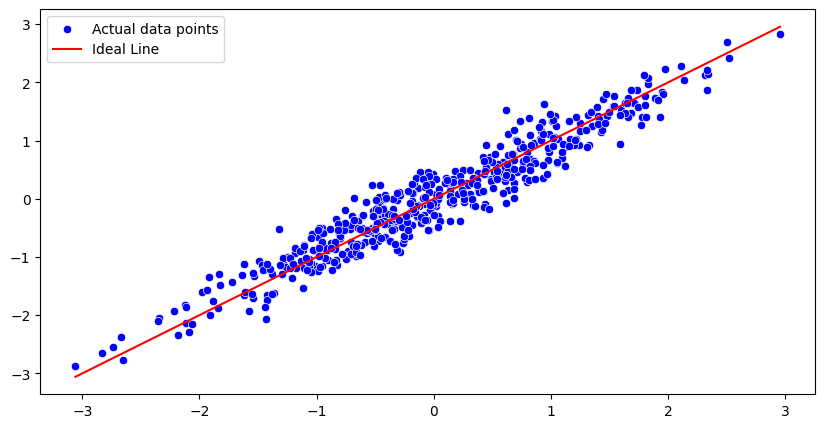

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label="Actual data points")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal Line")
plt.legend()
plt.show()

## Actual vs predicted values

In [ ]:
results = np.column_stack((y_test, y_pred))

print("Actual values   |      Predicted values")
print('_______________________________________')

for actual, predicted in results:
  print(f"{actual:14.2f}    |      {predicted:12.2f}")

Actual values   |      Predicted values
_______________________________________
          0.06    |              0.07
         -1.02    |             -1.16
          1.32    |              1.44
         -0.48    |             -0.73
         -0.80    |             -0.67
         -1.42    |             -1.66
         -0.18    |             -0.45
         -1.49    |             -1.06
          0.76    |              0.60
          0.16    |             -0.09
          0.59    |              0.63
          0.13    |              0.18
          1.48    |              1.43
          0.79    |              0.30
          0.59    |              0.44
         -0.32    |             -0.03
         -1.43    |             -1.75
         -0.26    |             -0.76
         -0.45    |             -0.03
          0.44    |             -0.10
         -2.34    |             -2.05
          0.62    |              1.52
          1.54    |              1.76
         -0.09    |             -0.10
        

## Residual analysis
- In linear regression we check how well the model fits the data. Difference between the actual data points adn the predctions from the model

In [ ]:
res = actual - y_pred.reshape(-1)
print(res)

[-1.26876078e+00 -3.67213417e-02 -2.63497621e+00 -4.64503078e-01
 -5.23383202e-01  4.62743386e-01 -7.51359388e-01 -1.34084535e-01
 -1.80107444e+00 -1.11228062e+00 -1.82777327e+00 -1.38058992e+00
 -2.62753728e+00 -1.49419403e+00 -1.63462988e+00 -1.17253464e+00
  5.47408671e-01 -4.40108473e-01 -1.16941437e+00 -1.10005854e+00
  8.56355948e-01 -2.71543838e+00 -2.96165591e+00 -1.10285974e+00
 -7.25789670e-01 -2.83525537e+00 -2.71525681e+00 -1.78723727e+00
 -1.63418384e+00 -2.06991916e+00  2.25327554e-01 -2.67731787e+00
 -1.85835411e+00 -6.14306309e-01 -1.34357756e+00 -3.07484172e-01
 -1.06649333e+00 -5.40997901e-01 -1.47337794e+00  7.04051304e-02
 -1.65232681e+00  6.58633397e-01 -4.06251973e-02 -3.07229814e+00
 -2.44261636e+00 -4.40687483e-01 -9.06756841e-01  4.68619823e-02
 -9.92007588e-01 -1.88083095e+00 -1.84208098e+00 -1.00648416e+00
 -8.20295648e-01 -1.56064752e+00 -9.65015452e-02 -4.98969798e-01
 -8.90473605e-01 -1.25548909e+00 -1.74886844e+00  8.75489243e-01
 -1.84729828e+00 -8.41273

## Distribution nplot for risdual(differ between actual and predicted)

<Axes: ylabel='Density'>

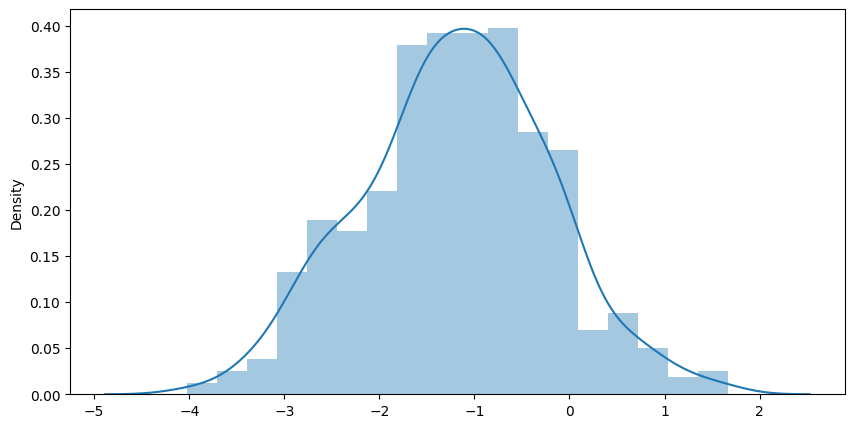

In [ ]:
sns.distplot(res, kde=True)

It represents that our model is not skewed as the distribution is center aligned but note the values of the X and Y axis they in power of 6. Which means the difference between actual and predicted value is high.

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)

print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  0.07892981267498214
RMSE:  0.2809445010584513


# Decision Tree Regressor
- Used for both classification and regression all below 3
- It invloves partioning the data into subsets based on independent values and predicting the avg of the target variable for each subset.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

# predicting the SalaPrice using test set
y_pred_dt = dt_reg.predict(x_test)
DTr = mean_squared_error(y_pred_dt, y_test)

#random forest accuracy wth test set
print("Decision Tree Regression: ", DTr)

Decision Tree Regression:  0.2458128602185086


# Random Forest Regressor
- Creates multiple decision trees during training and outputs the average prediction for regression from all individual tress.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

# predicting the SalaPrice using test set
y_pred_rf = rf_reg.predict(x_test)
RFr = mean_squared_error(y_pred_rf, y_test)

#random forest accuracy wth test set
print("Decision Tree Regression: ", RFr)

Decision Tree Regression:  0.11271512385488534


# Gradient Boosting Regressor
- It builds multiple decision trees sequentially, each one correcting the errors of its predecessor.
- Gradually step by step

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)

# predicting the SalaPrice using test set
y_pred_gb = gb_reg.predict(x_test)
GBr = mean_squared_error(y_pred_gb, y_test)

#random forest accuracy wth test set
print("Decision Tree Regression: ", GBr)

Decision Tree Regression:  0.09647591832243028


## Model Scoring

In [ ]:
model_scores = {
    "Linear Regression": 0.07892981267498214,
    "Decision Tree": 0.2458128602185086,
    "Random Forest": 0.11271512385488534,
    "Gradient Boosting": 0.09647591832243028
}

# sorted scores
sorted_scores = sorted(model_scores.items(), key=lambda x:x[1])

# display the ranking of the model
print("Model rankings:")
print("****************************")

for rank, (model_name, score) in enumerate(sorted_scores, start=1):
  print(f"{rank}. {model_name}: {score}")

Model rankings:
****************************
1. Linear Regression: 0.07892981267498214
2. Gradient Boosting: 0.09647591832243028
3. Random Forest: 0.11271512385488534
4. Decision Tree: 0.2458128602185086


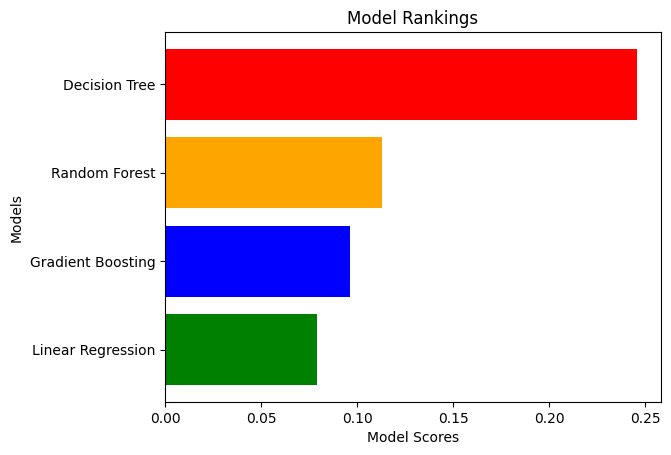

In [ ]:
import matplotlib.pyplot as plt

model_scores = {
    "Linear Regression": 0.07892981267498214,
    "Decision Tree": 0.2458128602185086,
    "Random Forest": 0.11271512385488534,
    "Gradient Boosting": 0.09647591832243028
}

# Define custom colors for each model
colors = ['green', 'blue', 'orange', 'red']

# Sorted scores
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Extracting model names and scores for plotting
model_names, scores = zip(*sorted_scores)

# Bar plot with custom colors
plt.barh(range(len(model_names)), scores, color=colors)
plt.xlabel('Model Scores')
plt.ylabel('Models')
plt.yticks(range(len(model_names)), model_names)
plt.title('Model Rankings')
plt.show()
